#  🚀 Task 2 _ mall customers clustering based on their purchase history 
in this project i will try to group the customers using KMeans algorithm :

what are the steps for this project :
- 1- importing libraries
- 2- explore data
- 3- visualize data
- 4- clustering 
- 5- insights

### 1-importing libraries

In [1]:
# import opendatasets as od

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
def distribution_plots(data,column,bins,color=None):
    _,(ax1,ax2)=plt.subplots(nrows=2)
    
    sns.histplot(x=column, data=data, kde=True,bins=bins , color= color,ax= ax1)
    ax1.set_title(f"Distribution of {column} feature")
    
    sns.boxplot(x=column, data=data, color= color,ax= ax2)
    ax2.set_title(f"Boxplot for Descriptive Analysis of {column} feature")
    
    plt.tight_layout()

### 2- explore data

In [101]:

data = pd.read_csv('../data/Mall_Customers.csv')
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.describe(include='O')


,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data_c=data.replace({'Female':0,'Male':1})

data_c.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


### 2-visualize data

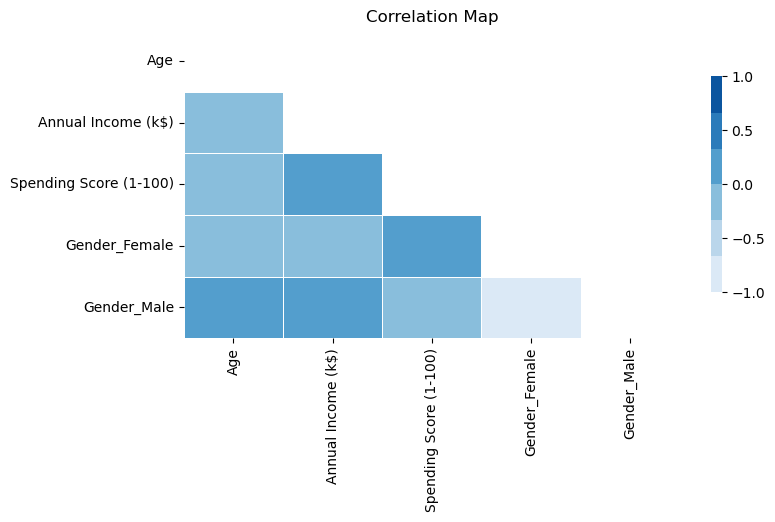

In [12]:
#correlation matrix
fig, axs = plt.subplots(figsize=(8, 4))
mat = data_c.drop(['CustomerID'],axis=1).corr(method = 'pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, mask=mask, cmap = sns.color_palette('Blues'), vmax=1, center=0, annot = False, linewidths=.5, cbar_kws={'shrink': .7})
axs.set_title("Correlation Map")
plt.show()

## insights on correlations :
- 1- spending score X Gender_female :
    there is correlation score between spending and female more than male , which is make sense , the reason is the women 
    shopping more than men in most cases .

- 2- annual Income X Gender_male :
    the correlation score between Income and male more than female 


In [19]:
data[data['Gender'] == 'Male']['Spending Score (1-100)'].sum()

4269

In [20]:
data[data['Gender'] == 'Female']['Spending Score (1-100)'].sum()

5771

Text(0, 0.5, 'sum of spending score')

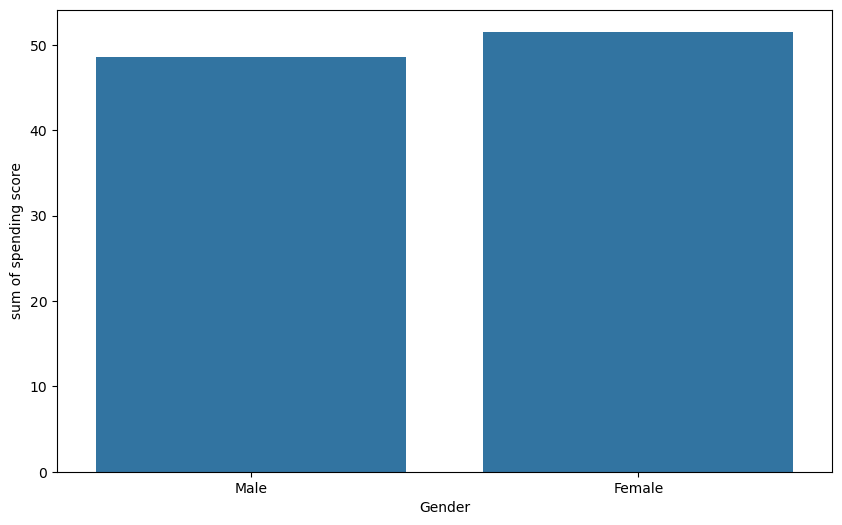

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Spending Score (1-100)',data=data,hue_order='#666666',ci=None)
plt.xlabel('Gender')
plt.ylabel('sum of spending score')

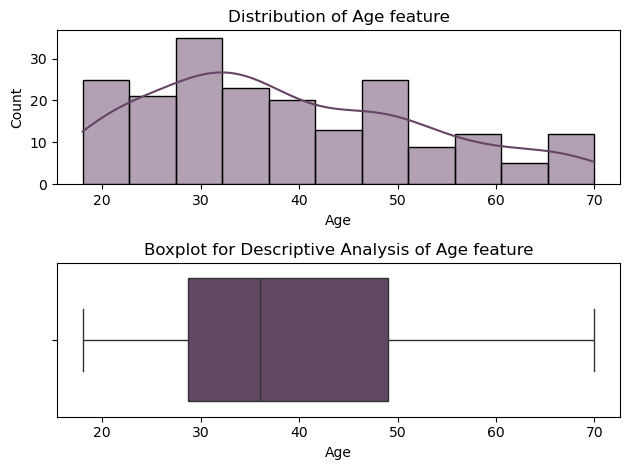

In [37]:
distribution_plots(data,"Age",bins=11,color="#664466")

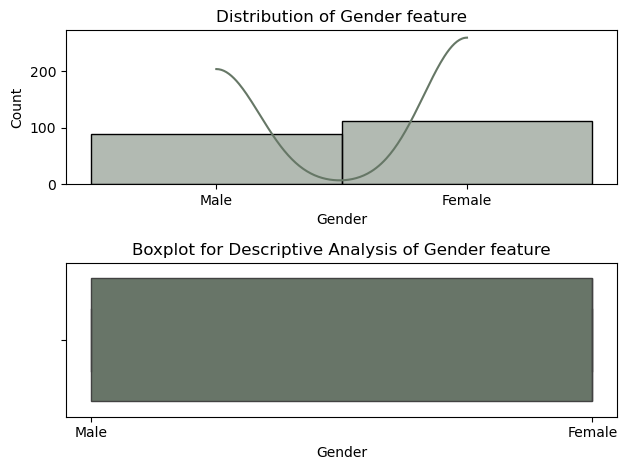

In [34]:
distribution_plots(data,"Gender",bins=11,color="#667766")

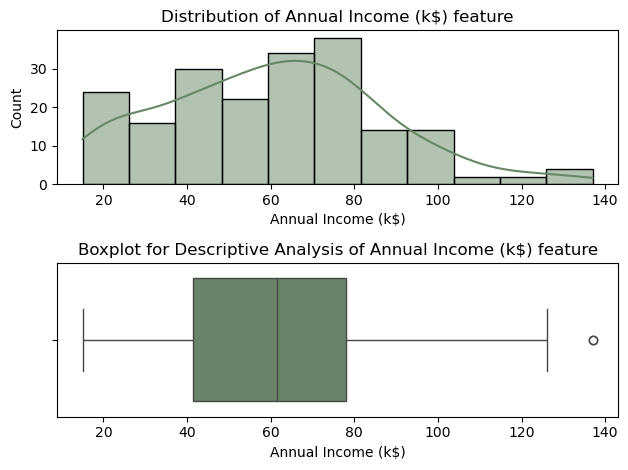

In [38]:
distribution_plots(data,"Annual Income (k$)",bins=11,color='#668866')

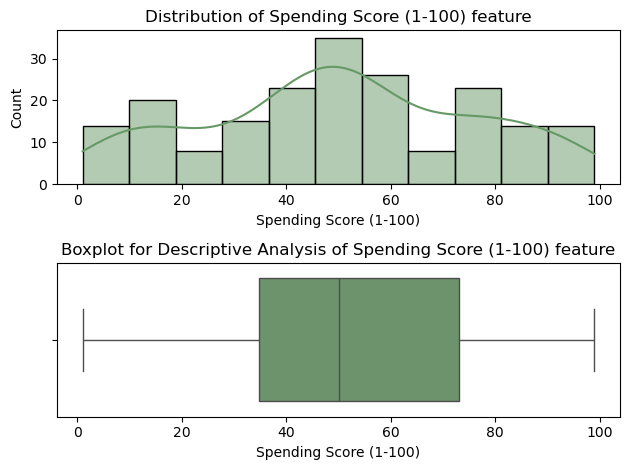

In [39]:
distribution_plots(data,"Spending Score (1-100)",bins=11,color='#669966')

Text(0.5, 1.0, 'Scatter Relating Spending Score to Age')

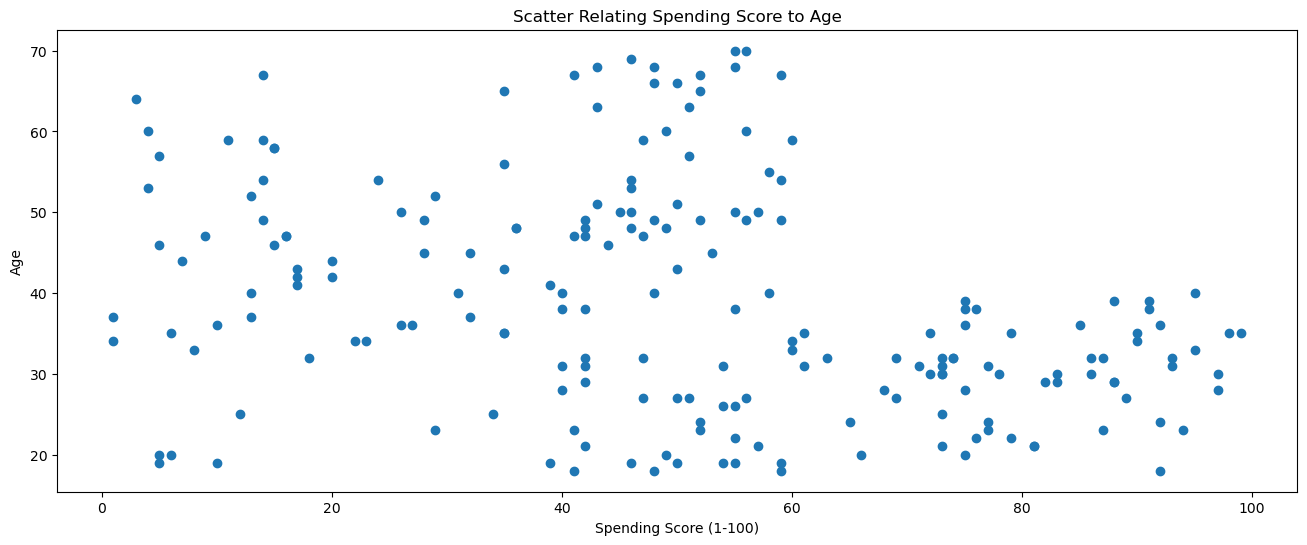

In [41]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data['Spending Score (1-100)'], y=data['Age'])
plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')
# plt.plot([min(data['Spending Score (1-100)']), max(data['Spending Score (1-100)'])], [min(data['Age']), max(data['Age'])], color='red', linestyle='-')
plt.title('Scatter Relating Spending Score to Age')

Text(0.5, 1.0, 'Scatter Relating Spending Score (1-100) to Annual Income (k$)')

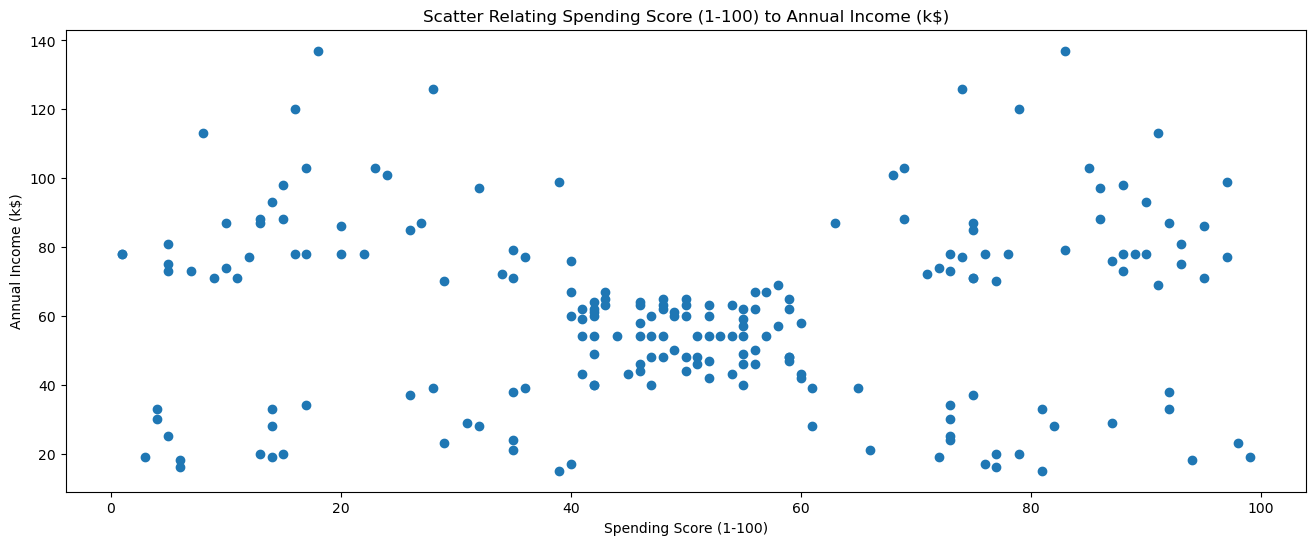

In [43]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=data['Spending Score (1-100)'], y=data['Annual Income (k$)'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.title('Scatter Relating Spending Score (1-100) to Annual Income (k$)')

In [45]:
data_c.dtypes

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender_Female             int32
Gender_Male               int32
dtype: object

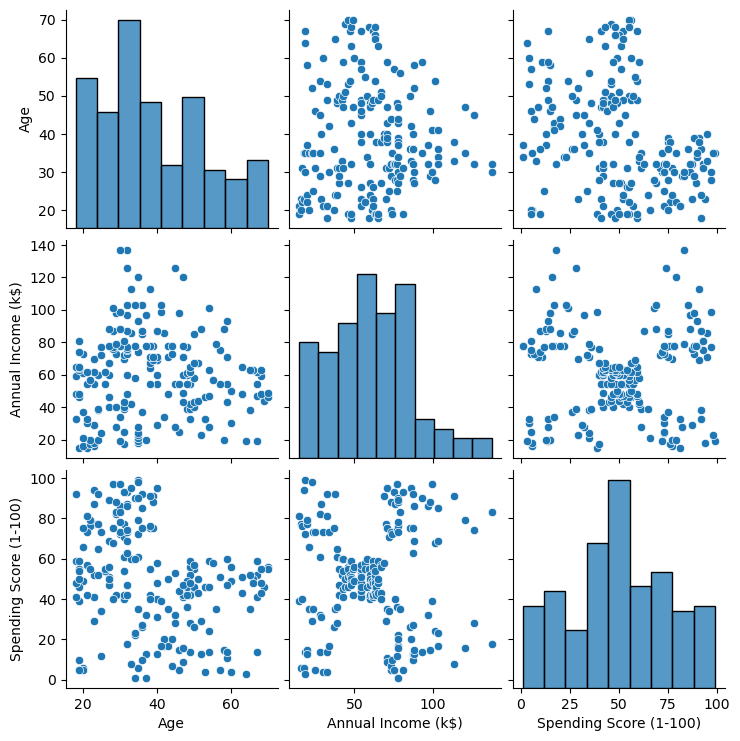

In [52]:
sns.pairplot(data)

### 4-clustering

In [104]:
n_clusters=5

KM_model=KMeans(n_clusters=n_clusters,max_iter=100,algorithm='lloyd',n_init=100,random_state=42)

KM_model.fit(data)

cluster_labels=KM_model.predict(data)

In [105]:
from sklearn.decomposition import PCA

pc_reduced = PCA(n_components=2,random_state=42)

pc_reduced.fit(data)

reduced_data= pc_reduced.transform(data)

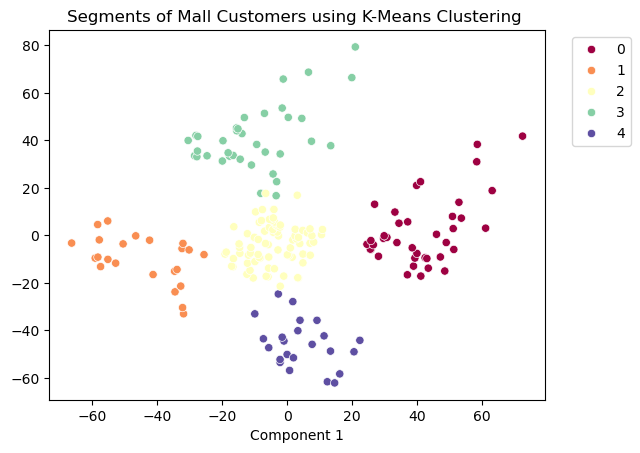

In [106]:
cmap =plt.colormaps['Spectral']

ax = sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1],hue=cluster_labels,palette=cmap)

ax.set_title("Segments of Mall Customers using K-Means Clustering ")

ax.set_xlabel("Component 0")
ax.set_xlabel("Component 1")

ax.legend(bbox_to_anchor=(1.04,1),loc="upper left");

In [107]:
pc_full =PCA(random_state=42).fit(data)

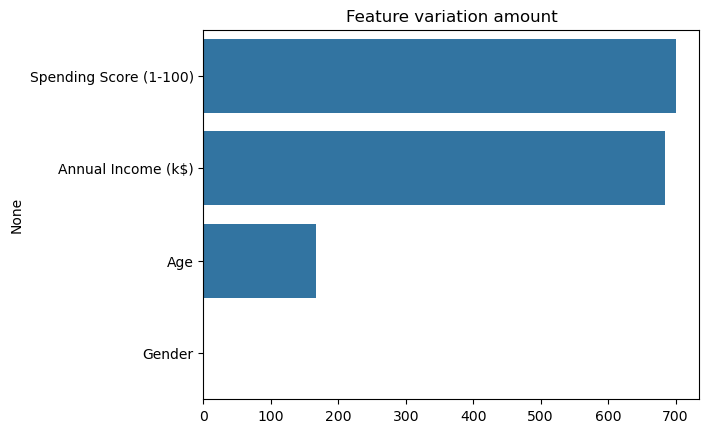

In [108]:
component_order = pc_full.explained_variance_.argsort()
var_sorted_columns=data.columns[component_order]
var_sorted_columns

ax= sns.barplot(y=var_sorted_columns,x=pc_full.explained_variance_ )
plt.title('Feature variation amount');

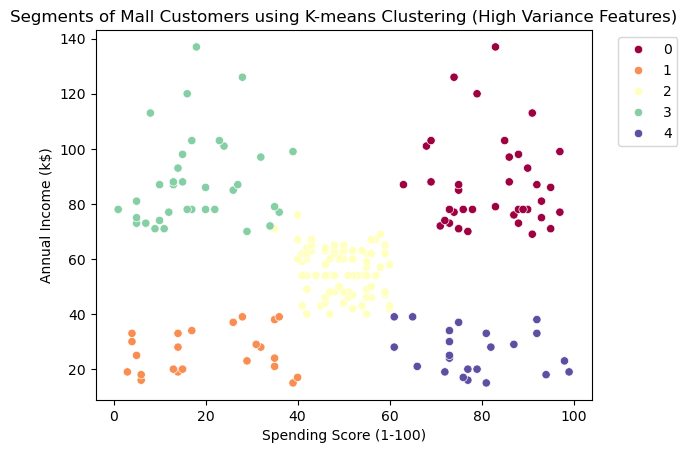

In [110]:
cmap = plt.colormaps['Spectral']

ax = sns.scatterplot(
    x=var_sorted_columns[0],
    y=var_sorted_columns[1],
    data=data,
    hue=cluster_labels,
    palette=cmap
)

ax.set_title('Segments of Mall Customers using K-means Clustering (High Variance Features)')

ax.legend(bbox_to_anchor=(1.04,1),loc="upper left");

### 5-insights

### insights on the groups :

- group_0 : represents customers with high spending score and high annual incomes
- group_1 : represents customers with low spending score and low annual incomes
- group_2 : represents customers with mid spending score and mid annual incomes
- group_3 : represents customers with low spending score and high annual incomes
- group_4 : represents customers with high spending score and low annual incomes  